In [1]:
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt 

import analysis
import catalog
import figures

tqdm.pandas()
catalog.display_parameters()

## Load the catalog

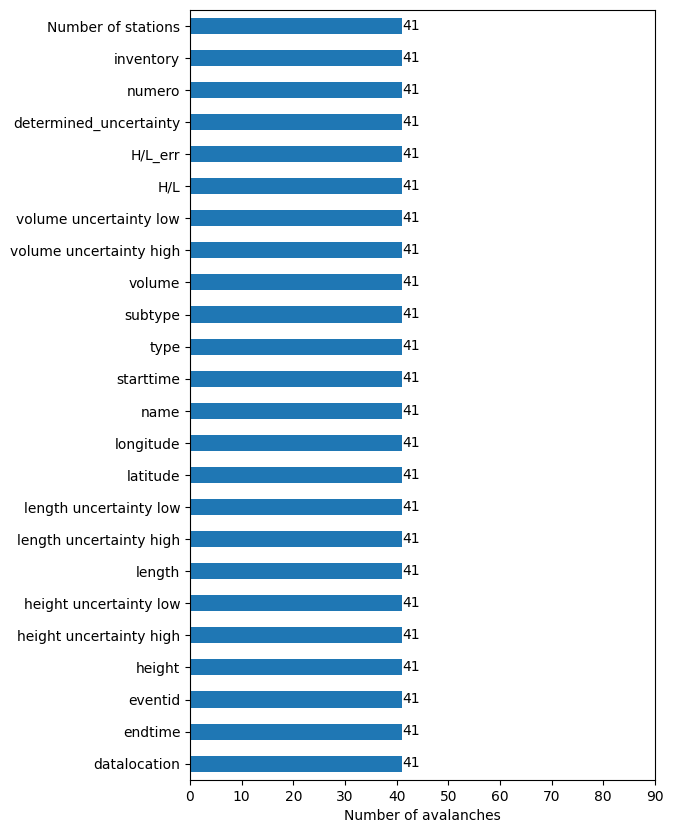

In [2]:
ESEC_avalanches = catalog.load("catalog/7_ESEC_avalanches_41.pickle")

catalog.open_plot(ESEC_avalanches, pos_number=0.11, xlim=90)

## Spectrum of one of the event trace

  0%|          | 0/41 [00:00<?, ?it/s]

-------------------------
Event numero 8
-------------------------
The distance of the trace is 80.84173760387873
Detection on trace 0


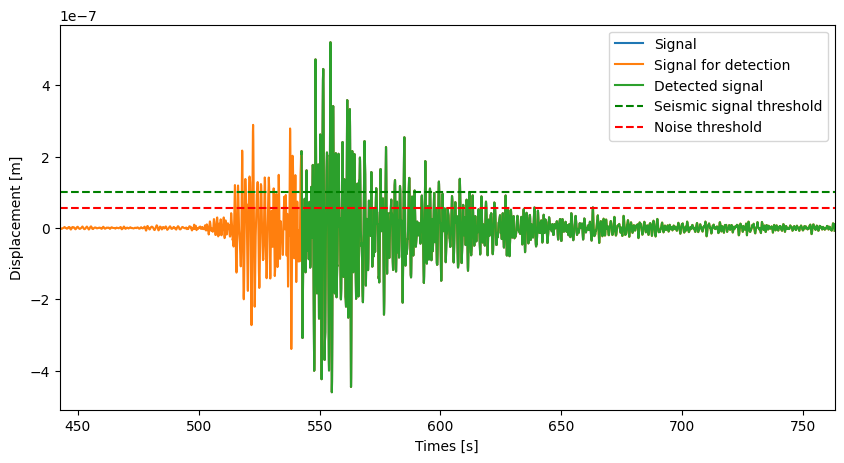

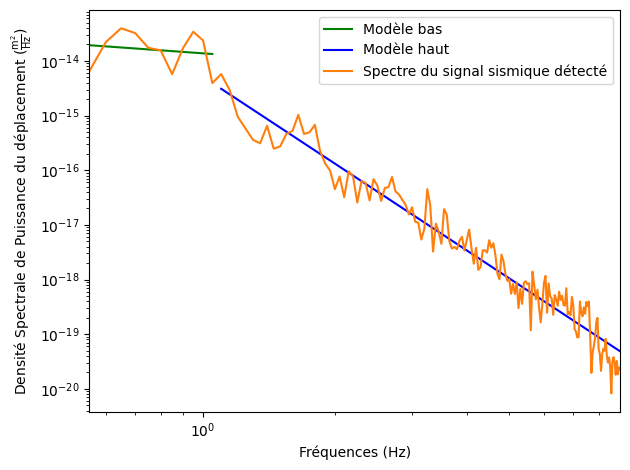

In [3]:
for event_index in tqdm(ESEC_avalanches["numero"], total=len(ESEC_avalanches)):
    if event_index == 8:
        print("-------------------------")
        print("Event numero", event_index)
        print("-------------------------")
        
        _, stream, trace = analysis.filter_stream(ESEC_avalanches, event_index, 0, freq_HP=9, freq_LP=0.5)

        #Detection method
        time_start_detection, data_start_detection, trimmed_time, trimmed_data, time_raw, data_raw, upper_threshold, lower_threshold, _ = analysis.detection_on_one_trace(trace, ESEC_avalanches, event_index, 0, -30, 10, detection_yes_or_no=[])
        
        figures.plot_detected_signal(time_raw, data_raw, time_start_detection, data_start_detection, trimmed_time, trimmed_data, upper_threshold, lower_threshold)
        plt.show()

        curve_params = analysis.plot_spectre(trace, ESEC_avalanches, trimmed_data, 0, event_index, conserv_result=True)